<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/2_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 장애인콜택시 대기시간 예측

탐색적 데이터 분석

## 1.환경설정

### (1) 경로 설정

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 설치 및 불러오기

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib


### (3) 데이터 불러오기

In [ ]:

from joblib import load
data1 = load('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/data1.pkl')

In [ ]:
data1.head(2)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,season,holiday,7_day_wait_time_mean,Boarding_rate,Cancel,Total_wait
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,...,52.0,33.0,9.79,1,Winter,1.0,NaN,0.903226,0.001082,23733.6
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,...,63.0,28.0,9.07,1,Winter,0.0,NaN,0.898987,0.000352,54317.6


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2923 non-null   datetime64[ns]
 1   Car_count             2923 non-null   int64         
 2   Register              2923 non-null   int64         
 3   Boarding              2923 non-null   int64         
 4   Wait_time             2923 non-null   float64       
 5   Average_mean          2923 non-null   int64         
 6   Riding_mean           2923 non-null   int64         
 7   Day_of_week           2923 non-null   category      
 8   Month                 2923 non-null   int32         
 9   Year                  2923 non-null   int32         
 10  waiting_time          2922 non-null   float64       
 11  temp_max              2923 non-null   float64       
 12  temp_min              2923 non-null   float64       
 13  rain(mm)          

In [ ]:
data1.describe()


,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,...,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,holiday,7_day_wait_time_mean,Boarding_rate,Cancel,Total_wait
count,2923,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2922.000000,...,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2917.000000,2923.000000,2923.000000,2923.000000
mean,2018-12-31 08:16:05.583304704,418.647622,3924.838180,3283.234348,40.300171,2304.362299,9254.353062,6.524119,2018.499145,40.306160,...,3.354465,79.089634,41.117961,13.494266,6.524119,0.048922,40.317165,0.841565,0.000383,164392.734759
min,2015-01-01 00:00:00,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000,1.000000,2015.000000,17.200000,...,0.000000,29.000000,7.000000,0.000000,1.000000,0.000000,18.800000,0.596996,0.000193,11107.200000
25%,2016-12-31 12:00:00,278.000000,2161.000000,1778.500000,29.600000,2228.000000,8521.000000,4.000000,2016.500000,29.600000,...,0.000000,70.000000,29.000000,8.235000,4.000000,0.000000,31.300000,0.805964,0.000236,86150.500000
50%,2018-12-31 00:00:00,454.000000,4720.000000,3932.000000,38.200000,2257.000000,8822.000000,7.000000,2018.000000,38.200000,...,0.000000,82.000000,39.000000,12.660000,7.000000,0.000000,39.042857,0.845571,0.000254,157134.600000
75%,2020-12-30 12:00:00,522.000000,5110.000000,4241.000000,48.600000,2401.000000,10154.000000,10.000000,2020.000000,48.600000,...,0.300000,90.000000,51.000000,18.580000,10.000000,0.000000,46.985714,0.877718,0.000562,231603.850000
max,2022-12-31 00:00:00,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,12.000000,2022.000000,96.100000,...,178.900000,100.000000,98.000000,30.790000,12.000000,1.000000,83.928571,0.968844,0.002165,464160.000000
std,NaN,133.764485,1510.056733,1249.463168,14.099285,107.351769,1020.066902,3.449303,2.291306,14.097992,...,12.593801,14.031115,16.396795,6.939983,3.449303,0.215743,12.030254,0.052167,0.000225,91291.255676


## 2.EDA : 1단계 - 개별 정보 분석하기

### (1) 단변량 분석 함수 작성

In [ ]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [ ]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
Register,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0


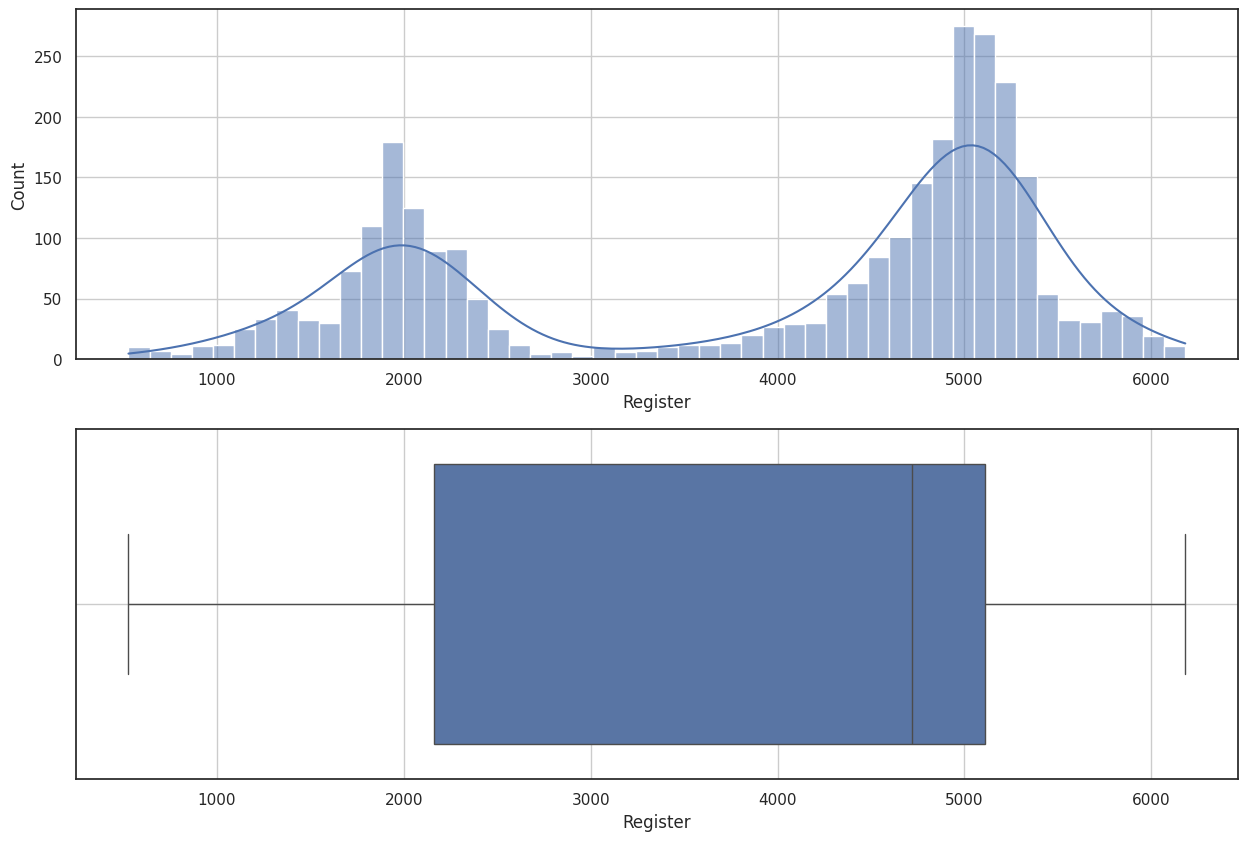

In [ ]:

eda_1_n(data1, 'Register', hue_var = '')

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
Boarding,2923.0,3283.234348,1249.463168,462.0,1778.5,3932.0,4241.0,5189.0


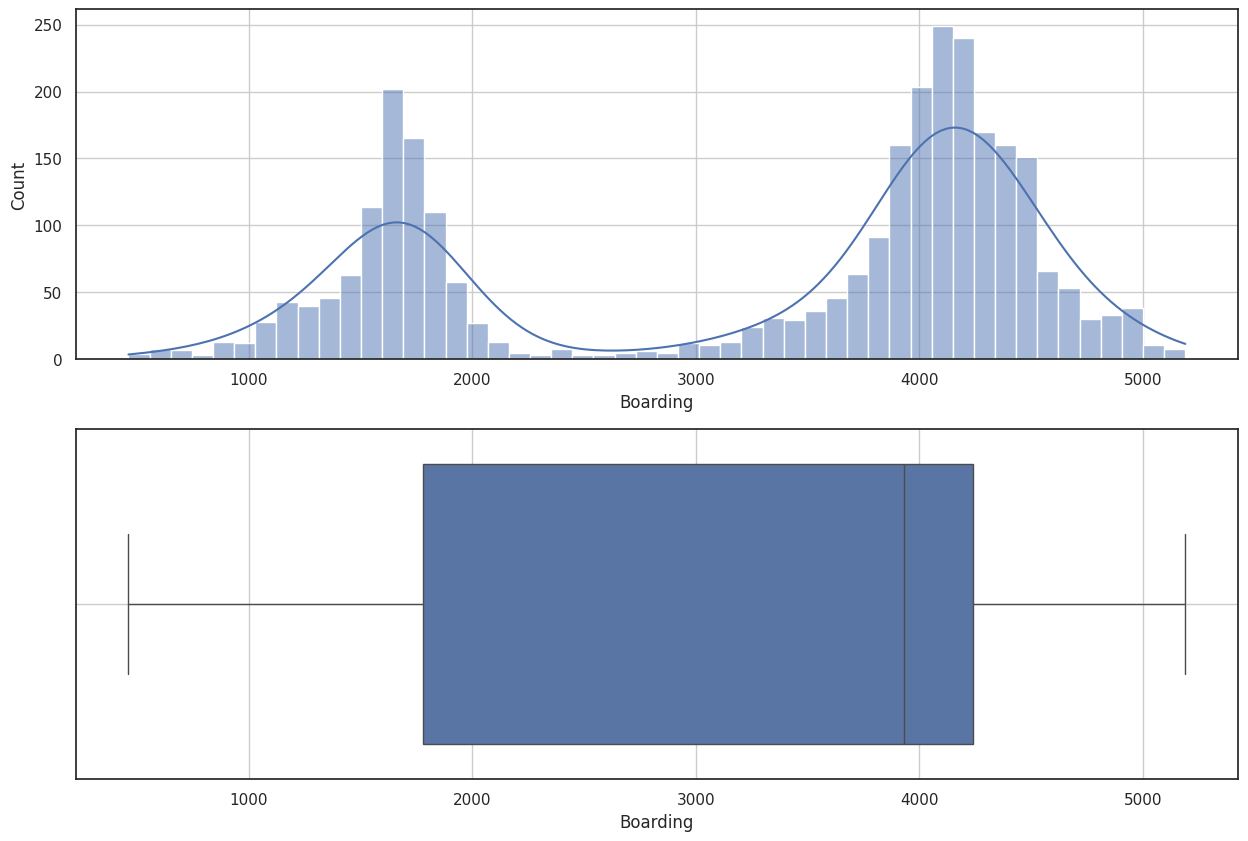

In [ ]:

eda_1_n(data1, 'Boarding', hue_var = '')


#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
Average_mean,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


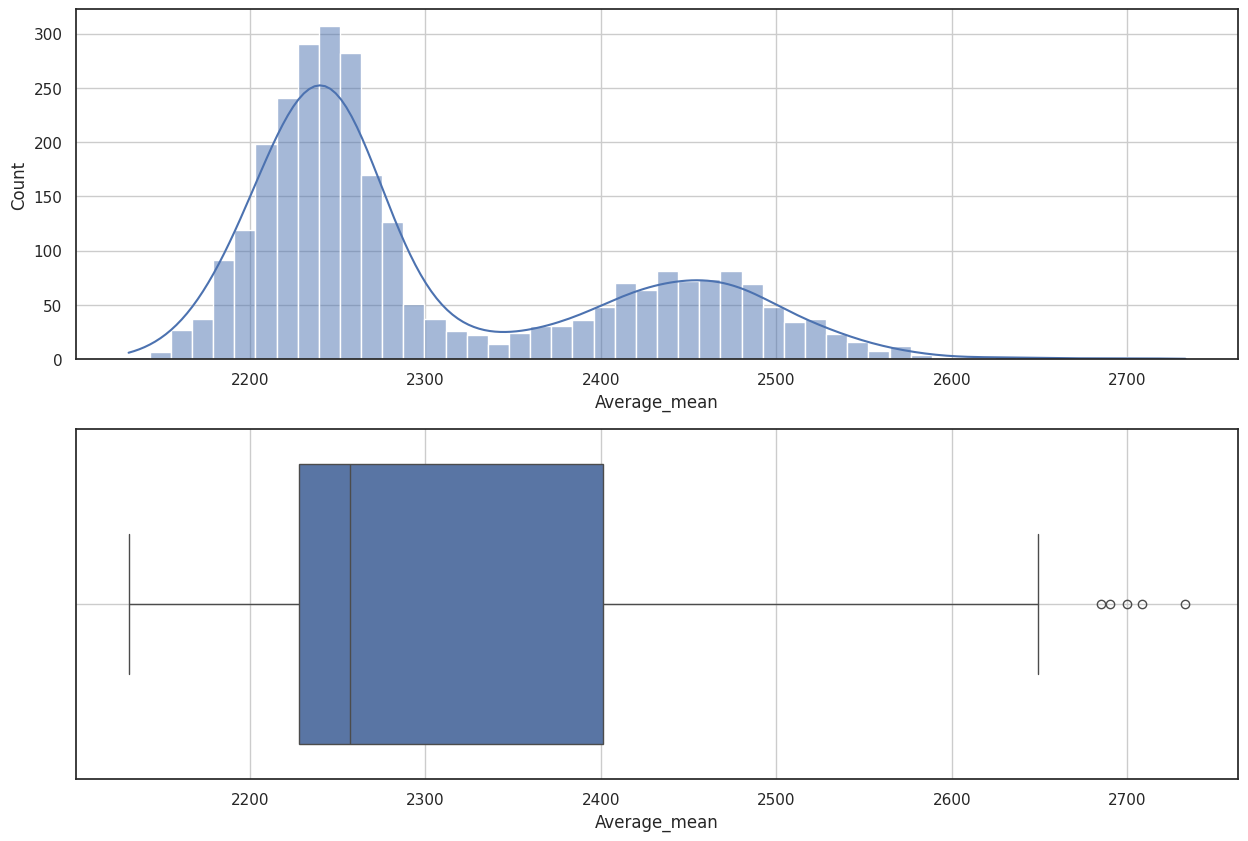

In [ ]:

eda_1_n(data1, 'Average_mean', hue_var = '')


#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
Riding_mean,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


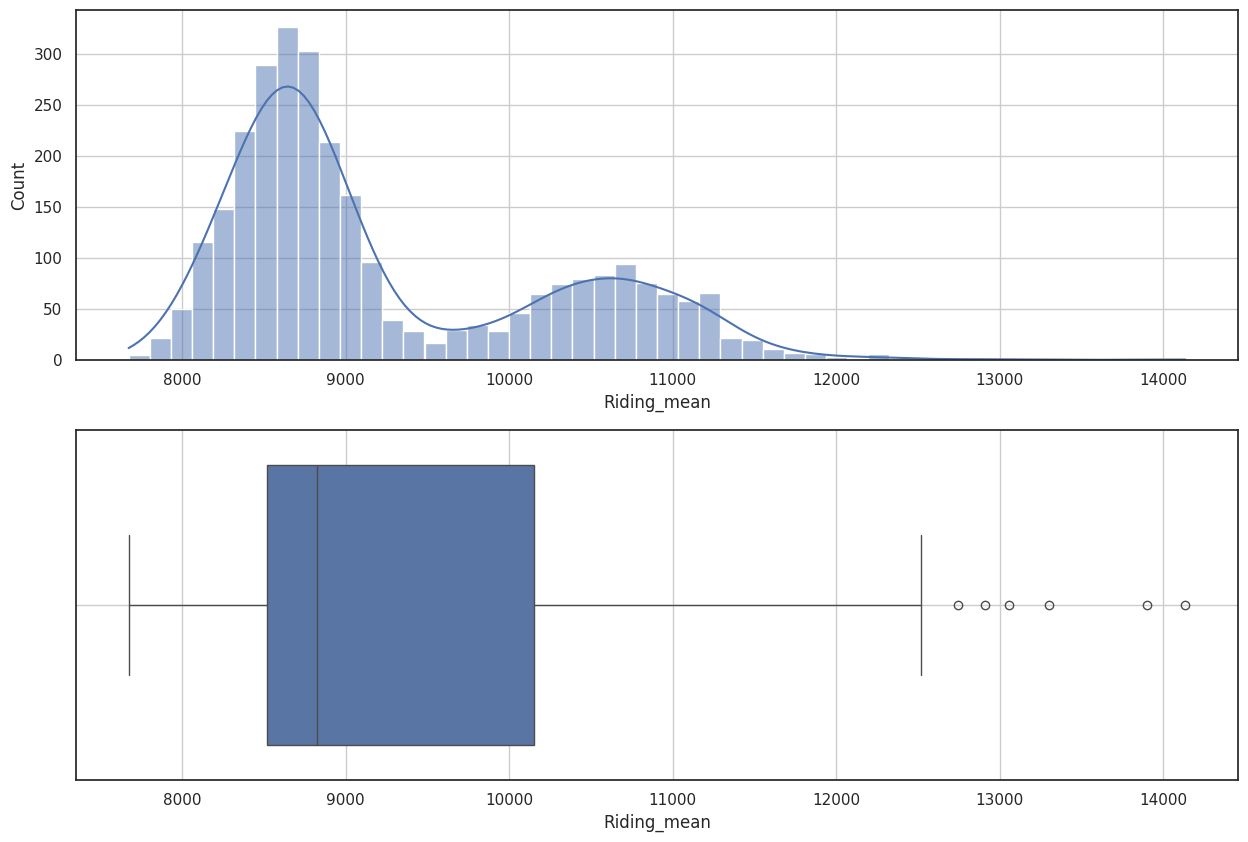

In [ ]:

eda_1_n(data1, 'Riding_mean', hue_var = '')


#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
Boarding,2923.0,3283.234348,1249.463168,462.0,1778.5,3932.0,4241.0,5189.0


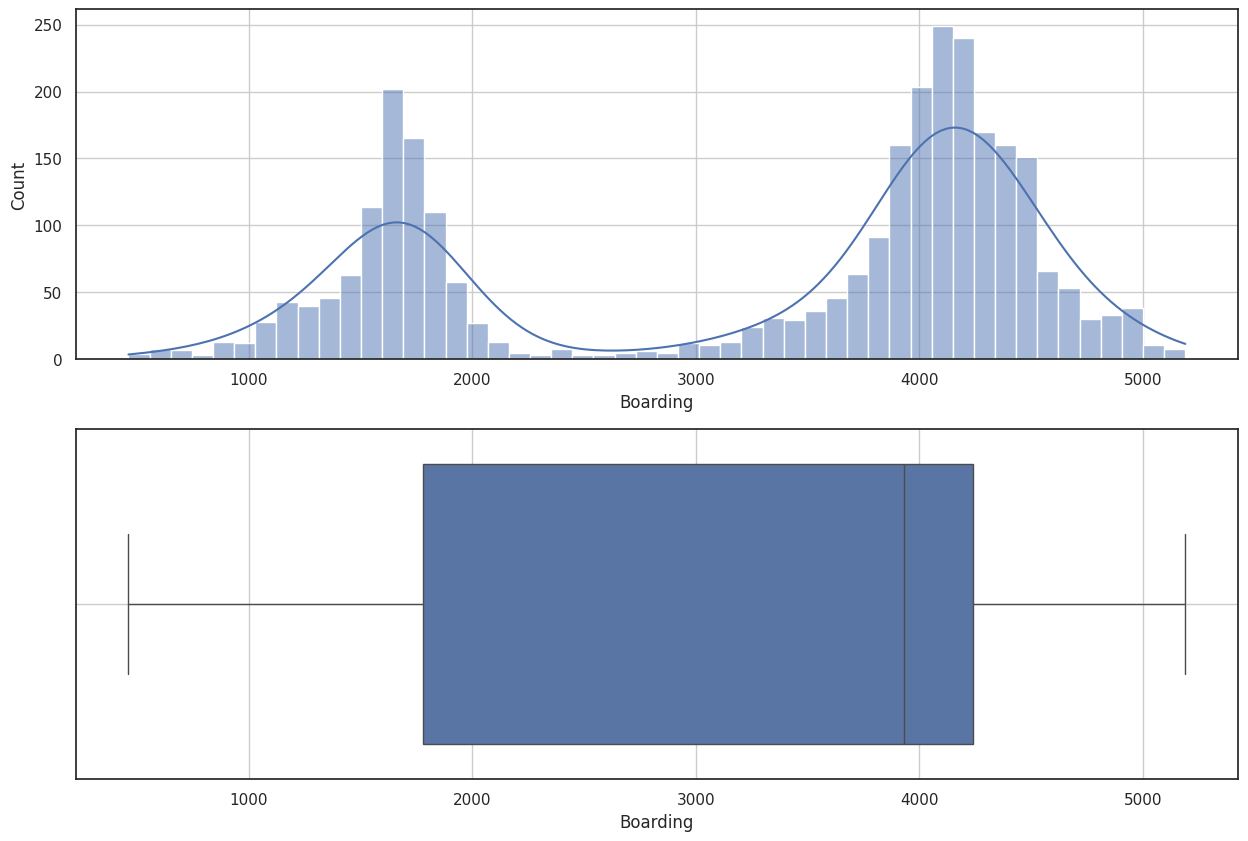

In [ ]:

eda_1_n(data1, 'Boarding', hue_var = '')

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
sunshine(MJ/m2),2923.0,13.494266,6.939983,0.0,8.235,12.66,18.58,30.79


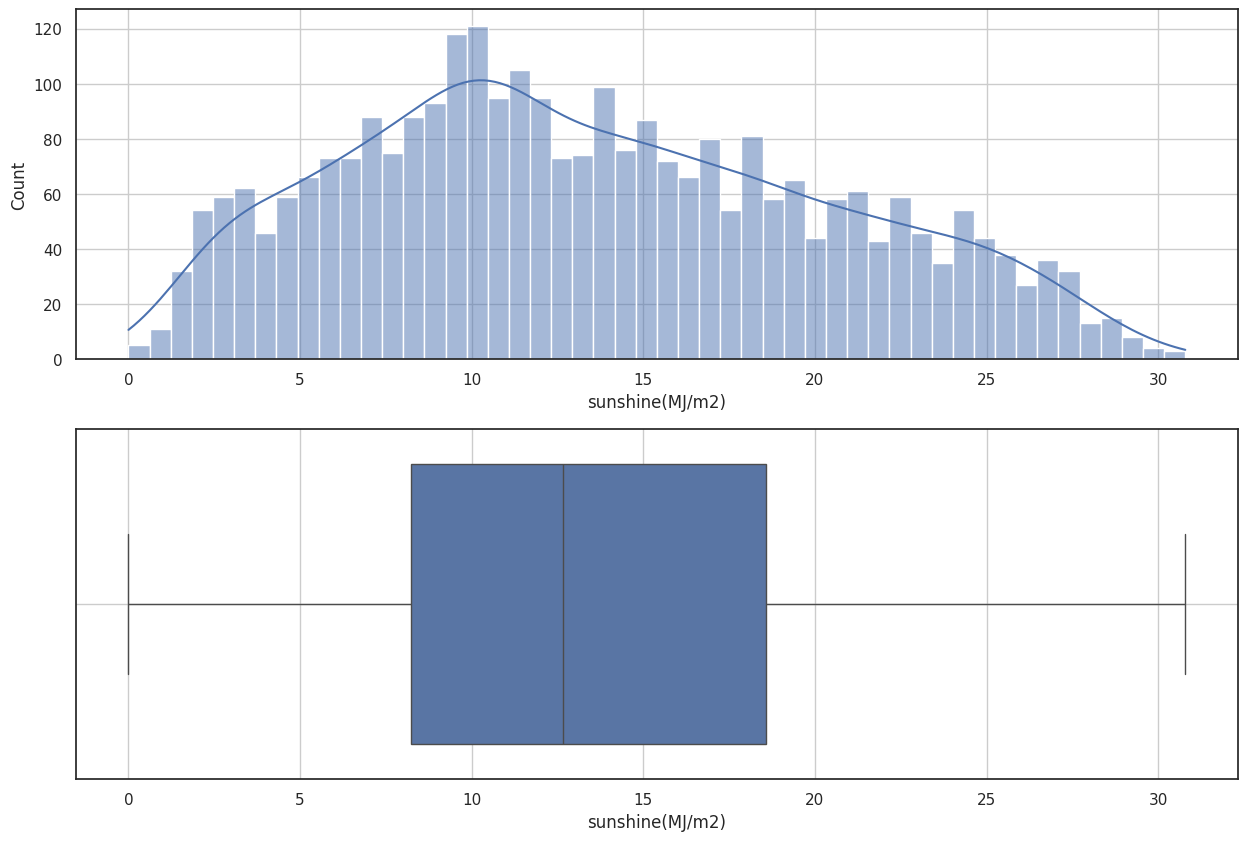

In [ ]:
eda_1_n(data1, 'sunshine(MJ/m2)', hue_var = '')


#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


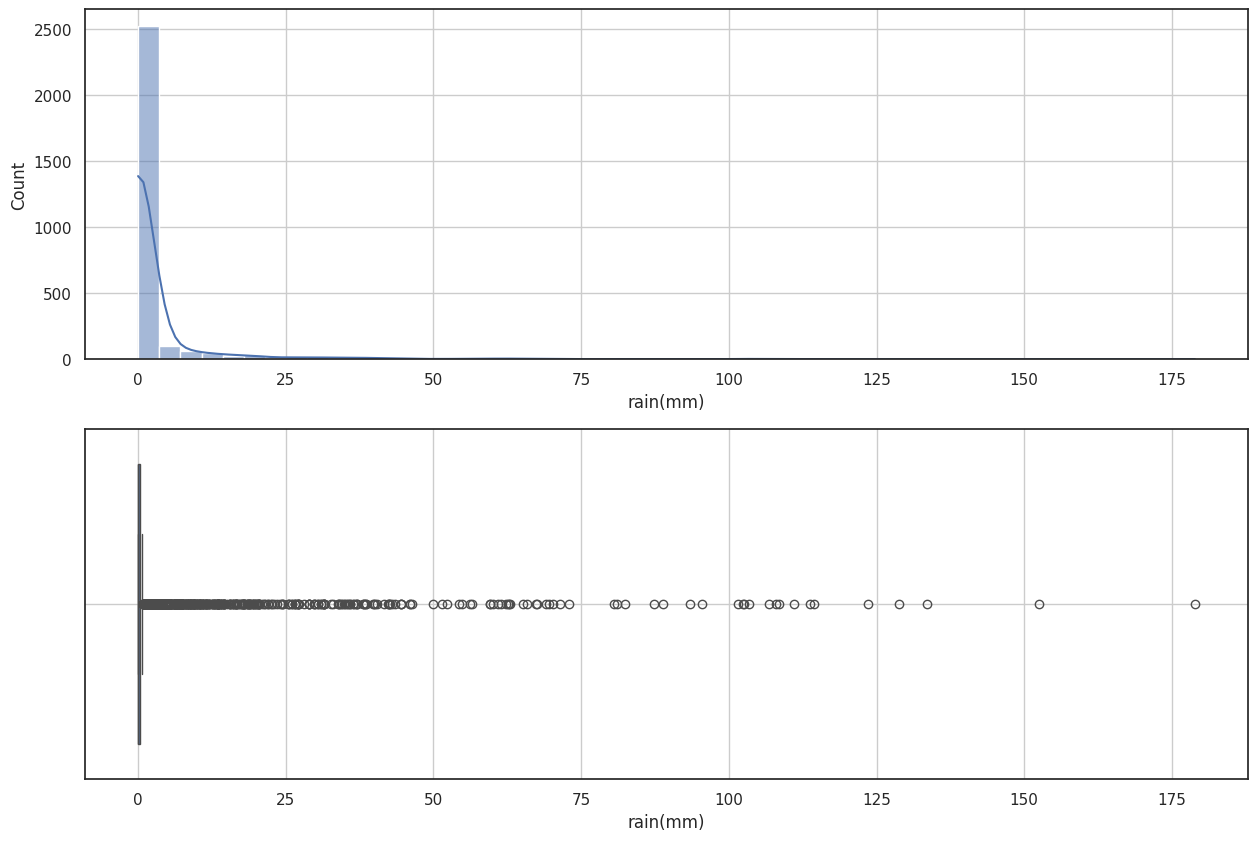

In [ ]:

eda_1_n(data1, 'rain(mm)', hue_var = '')


### (3) 범주형 변수

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2780,0.951078
1.0,143,0.048922


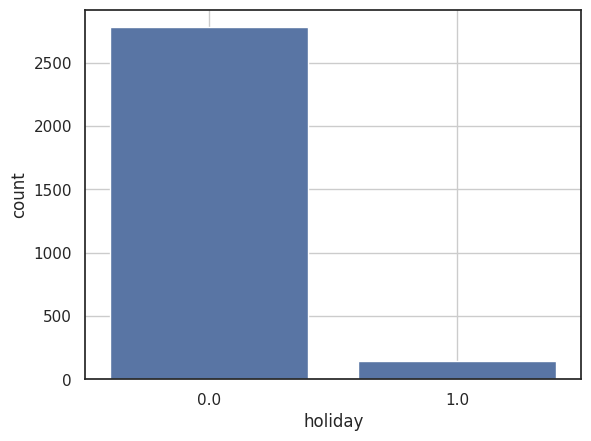

In [ ]:
eda_1_c(data1, 'holiday', hue_var = '')


In [ ]:
sum(data1['holiday'] == 1)

143

## 3.feature와 target 비교 분석하기



### (1) 숫자 feature --> Target


#### 1) 전체 상관계수 시각화

In [ ]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [ ]:
data1.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'season', 'holiday',
       '7_day_wait_time_mean', 'Boarding_rate', 'Cancel', 'Total_wait'],
      dtype='object')

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,7_day_wait_time_mean,Cancel,Total_wait,Boarding_rate
Car_count,1.0,0.885889,0.904672,0.035818,-0.844675,-0.857679,0.087627,0.102786,0.106593,0.028514,0.065432,0.097464,0.059682,-0.099274,-0.069125,-0.797363,0.599216,-0.028601
Register,0.0,1.000000,0.988752,0.291891,-0.850307,-0.847743,0.316181,0.052883,0.052570,0.004514,0.007206,0.007699,0.006840,-0.102210,0.186016,-0.911328,0.807483,-0.251526
Boarding,0.0,0.000000,1.000000,0.184340,-0.867915,-0.858609,0.229127,0.058832,0.055509,-0.013864,0.009693,0.011012,0.029290,-0.110745,0.079146,-0.914235,0.729971,-0.117813
Wait_time,0.0,0.000000,0.000000,1.000000,0.020257,-0.013197,0.732299,0.045379,0.034358,0.028477,-0.035933,-0.092415,-0.042056,-0.056988,0.842009,-0.240708,0.757150,-0.770392
Average_mean,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977569,-0.048772,0.095625,0.068791,-0.051052,-0.017234,-0.065059,0.063693,0.039533,0.122805,0.790505,-0.550296,0.008032
Riding_mean,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.083855,0.098136,0.071066,-0.057045,-0.016442,-0.068509,0.054795,0.048373,0.078680,0.774168,-0.571758,0.048126
waiting_time,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.049062,0.037327,-0.018083,-0.052330,-0.100113,-0.026437,-0.012576,0.799468,-0.250404,0.654345,-0.588797
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961639,0.117001,0.307637,0.284836,0.475349,0.029430,0.040441,-0.065462,0.061042,0.021635
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201881,0.401867,0.462083,0.308662,0.029014,0.031535,-0.061380,0.058073,0.010979
rain(mm),0.0,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.335369,0.446553,-0.285399,-0.016015,-0.007754,0.018991,0.039653,-0.079192


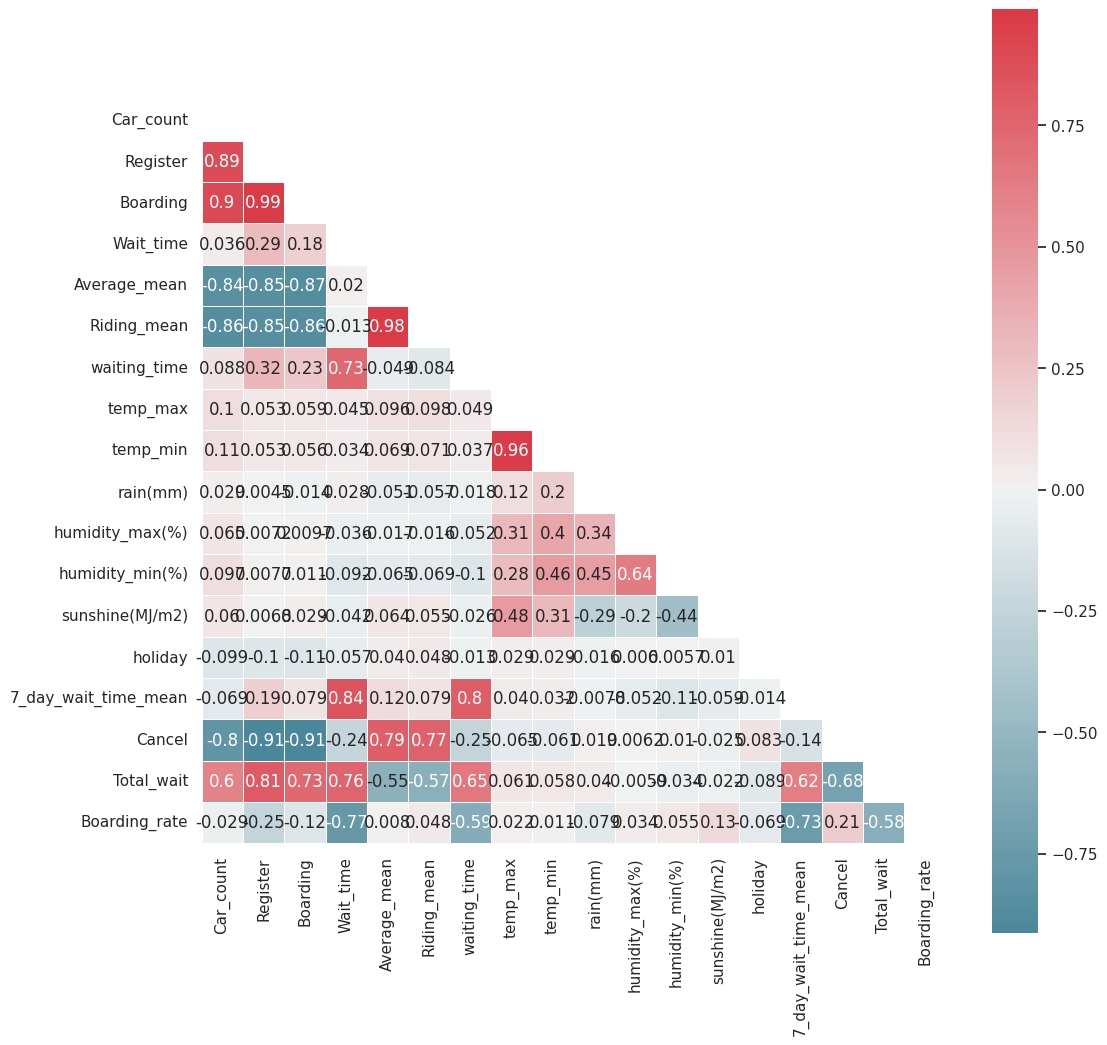

In [ ]:
num_vars = ['Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'holiday','7_day_wait_time_mean', 'Cancel','Total_wait','Boarding_rate']

eda_2_corr(data1, num_vars)

#### 2) 산점도

In [ ]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

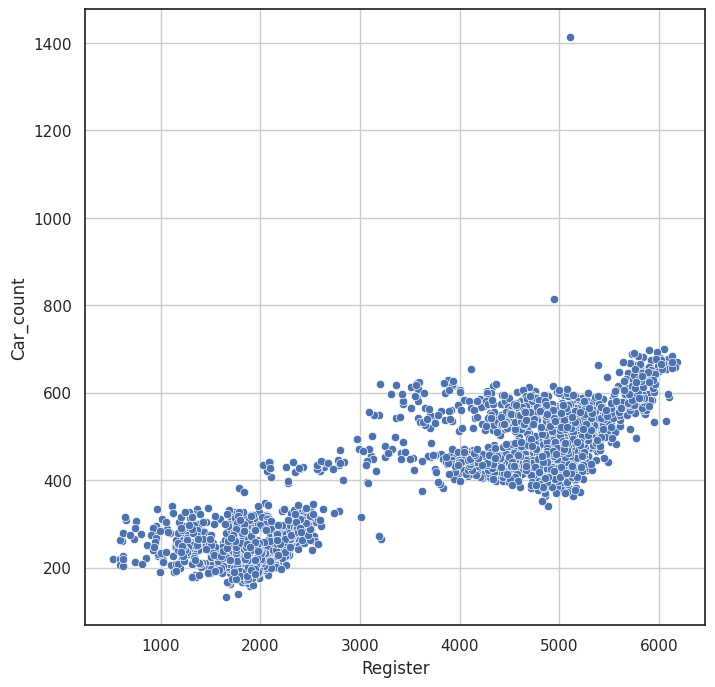

In [ ]:
eda_2_nn(data1, 'Car_count', 'Register')

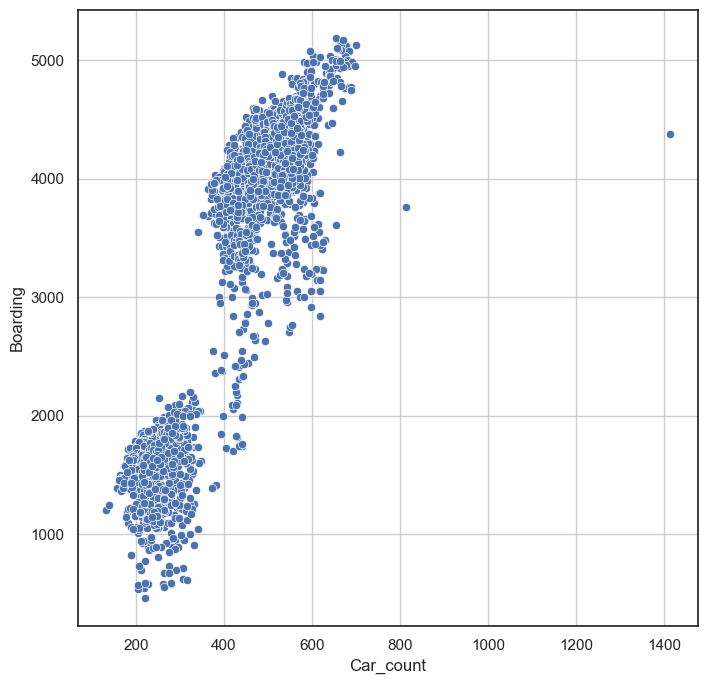

In [ ]:
eda_2_nn(data1, 'Boarding', 'Car_count')

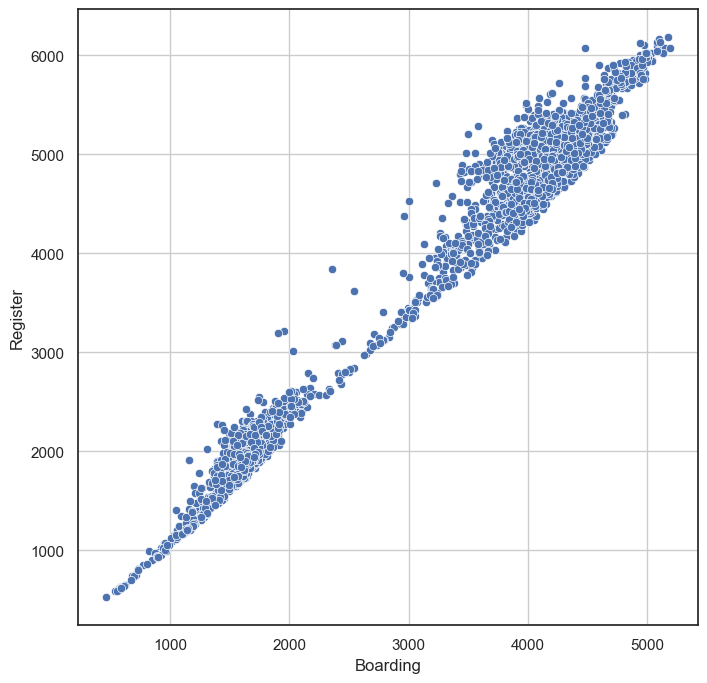

In [ ]:
eda_2_nn(data1, 'Register', 'Boarding')

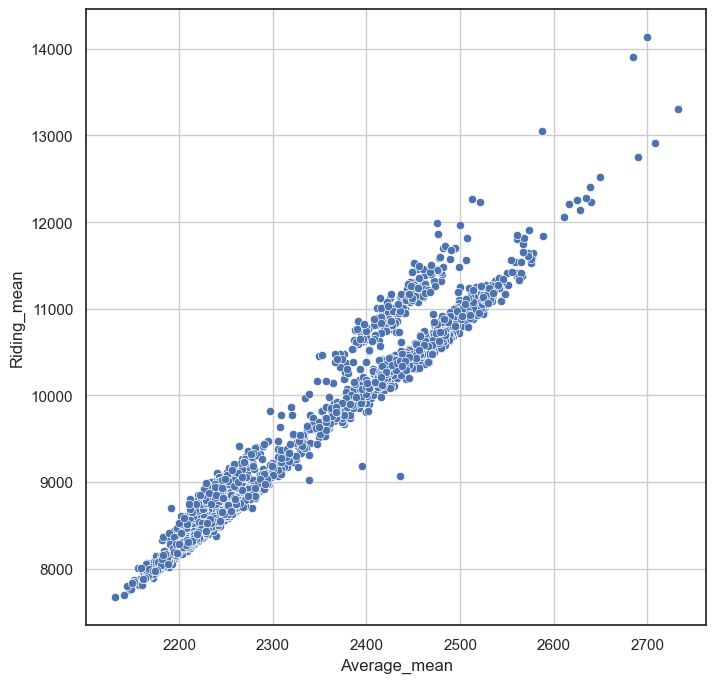

In [ ]:
eda_2_nn(data1, 'Riding_mean', 'Average_mean')

* fare

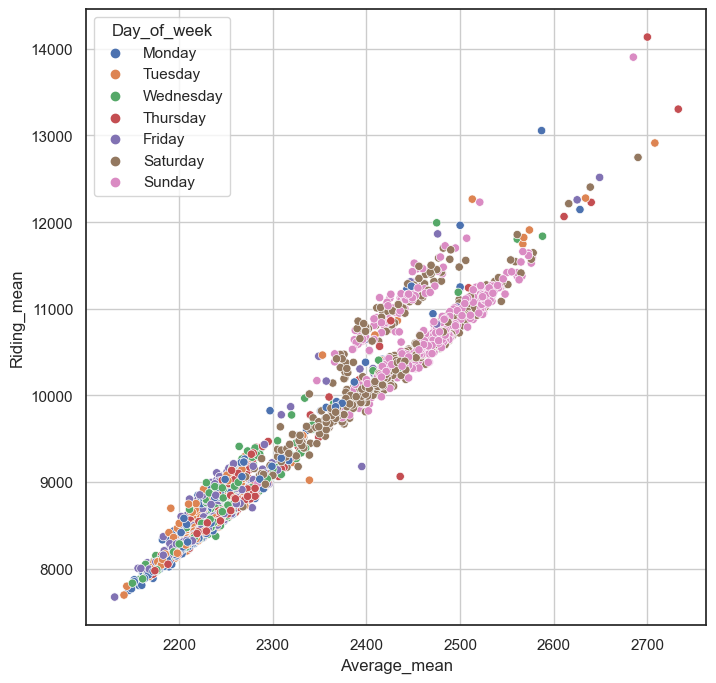

In [ ]:
eda_2_nn(data1, 'Riding_mean', 'Average_mean', 'Day_of_week')

### (2) 범주 feature --> Target

In [ ]:
data1.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'season', 'holiday',
       '7_day_wait_time_mean', 'Cancel', 'Total_wait', 'Boarding_rate'],
      dtype='object')

* 휴일 여부

In [ ]:
target = 'waiting_time'

In [ ]:
# t-test
h0 = data1.loc[data1['holiday']==0, target]
h1 = data1.loc[data1['holiday']==1, target]
spst.ttest_ind(h0, h1)

TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

* 요일

In [ ]:

target = 'waiting_time'


In [ ]:
# anova
temp = data1.loc[data1['Day_of_week'].notnull()]

w0 = temp.loc[temp['Day_of_week']=='Monday', target]
w1 = temp.loc[temp['Day_of_week']=='Tuesday', target]
w2 = temp.loc[temp['Day_of_week']=='Wednesday', target]
w3 = temp.loc[temp['Day_of_week']=='Thursday', target]
w4 = temp.loc[temp['Day_of_week']=='Friday', target]
w5 = temp.loc[temp['Day_of_week']=='Saturday', target]
w6 = temp.loc[temp['Day_of_week']=='Sunday', target]

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))

* 계절

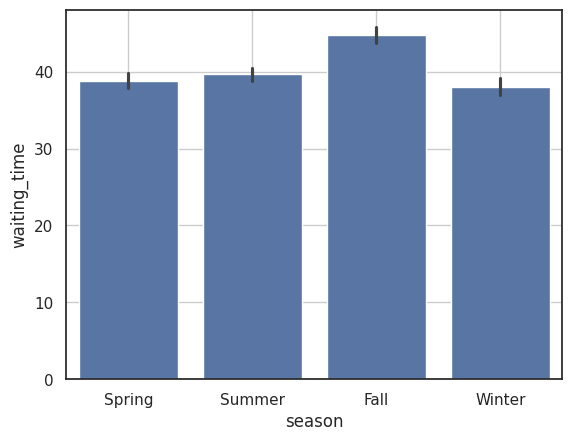

In [ ]:
sns.barplot(x = 'season', y = target, data = data1)
plt.grid()
plt.show()

In [ ]:
# # anova
temp = data1.loc[data1['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', target]
s1 = temp.loc[temp['season']=='Summer', target]
s2 = temp.loc[temp['season']=='Fall', target]
s3 = temp.loc[temp['season']=='Winter', target]

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [ ]:
print(sum(data1['holiday']==0))
print(sum(data1['holiday']==1))

2780
143


In [ ]:
data1.loc[data1['Day_of_week'] == 'Sunday', 'holiday'] = 1

In [ ]:
print(sum(data1['holiday']==0))
print(sum(data1['holiday']==1))

2382
541


### 2015~2022년 평일, 공휴일 일일 평균 콜택시 호출 건수

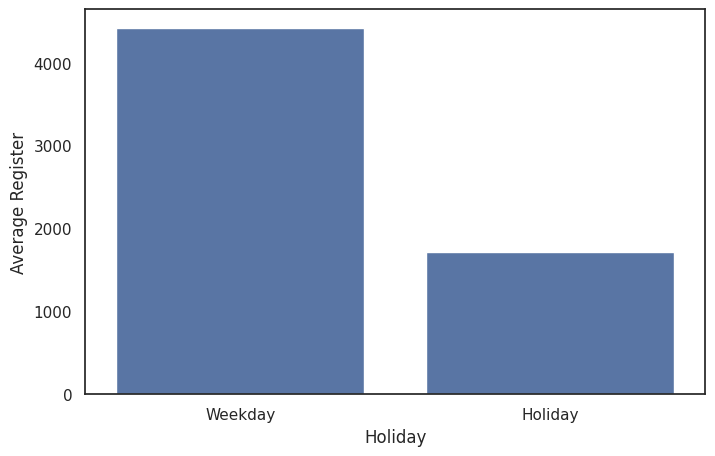

In [ ]:
holiday_register = data1.groupby('holiday')['Register'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_register, x='holiday', y='Register')

plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Average Register', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Holiday'])
plt.show()

## 4.데이터 저장

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1.to_csv('data2.csv', index=False)
